In [1]:
from p01b_logreg import main as p01b
from p01e_gda import main as p01e
from p02cde_posonly import main as p02
from p03d_poisson import main as p03
from p05b_lwr import main as p05b
from p05c_tau import main as p05c
import numpy as np
import util
import matplotlib.pyplot as plt

In [2]:
train_path1 ='../data/ds1_train.csv'
eval_path1 ='../data/ds1_valid.csv'
pred_path1 ='output/p01b_pred_1.txt'

In [3]:
train_path2 ='../data/ds2_train.csv'
eval_path2 ='../data/ds2_valid.csv'
pred_path2 ='output/p01b_pred_2.txt'

In [4]:
theta1_lr, p1_lr = p01b(train_path1,eval_path1,pred_path1,k=1)
theta2_lr, p2_lr = p01b(train_path2,eval_path2,pred_path2,k=1)
theta1_gda, p1_gda = p01e(train_path1,eval_path1,pred_path1,k=1)
theta2_gda, p2_gda = p01e(train_path2,eval_path2,pred_path2,k=1)

In [5]:
x1,y1 = util.load_dataset(eval_path1, add_intercept = True)
x2,y2 = util.load_dataset(eval_path2, add_intercept = True)

In [6]:
def plot(x,y,theta_lr,theta_gda):
    plt.figure()
    plt.plot(x[y==0,-2],x[y==0,-1],'bx')
    plt.plot(x[y==1,-2],x[y==1,-1],'go')
    x1 = np.arange(min(x[:, -2]), max(x[:, -2]), 0.01)
    x2 = -(theta_lr[0] / theta_lr[2] + theta_lr[1] / theta_lr[2] * x1)
    x3 = -(theta_gda[0] / theta_gda[2] + theta_gda[1] / theta_gda[2] * x1)

    plt.plot(x1,x2,'r')
    plt.plot(x1,x3,'y')
    plt.xlabel('x1')
    plt.ylabel('x2')

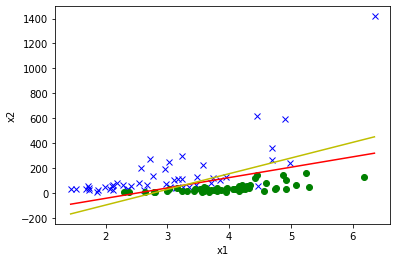

In [7]:
plot(x1,y1,theta1_lr,theta1_gda)

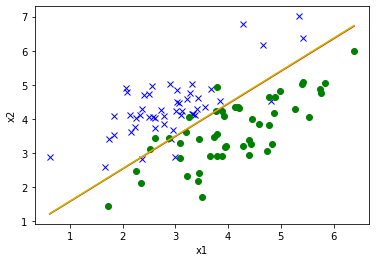

In [8]:
plot(x2,y2,theta2_lr,theta2_gda)

In [9]:
def accuracy(y,p):
    m = y.shape[0]
    c = 0
    for i in range(m):
        if(y[i] == p[i]):
            c += 1
    print("accuracy = ",(c*100/m),"%")

In [10]:
accuracy(y1,p1_lr)
accuracy(y2,p2_lr)
accuracy(y1,p1_gda)
accuracy(y2,p2_gda)

accuracy =  90.0 %
accuracy =  91.0 %
accuracy =  83.0 %
accuracy =  91.0 %


In [11]:
eval_path ='../data/ds3_test.csv'
train_path ='../data/ds3_train.csv'
val_path = '../data/ds3_valid.csv'
pred_path='output/p02X_pred.txt'

In [12]:
x,y = util.load_dataset(eval_path,label_col = 't',add_intercept = True)
p = p02(train_path,val_path,eval_path,pred_path,k=1)

In [13]:
accuracy(y,p)

accuracy =  98.38709677419355 %


In [14]:
x,y = util.load_dataset(eval_path,label_col = 't',add_intercept = True)

p = p02(train_path,val_path,eval_path,pred_path,k=2)

In [15]:
accuracy(y,p)

accuracy =  50.0 %


In [16]:
x,y = util.load_dataset(eval_path,label_col = 't',add_intercept = True)
p = p02(train_path,val_path,eval_path,pred_path,k=3)
accuracy(y,p)

accuracy =  95.96774193548387 %


In [17]:
p03(lr=1e-7,
        train_path='../data/ds4_train.csv',
        eval_path='../data/ds4_valid.csv',
        pred_path='output/p03d_pred.txt')


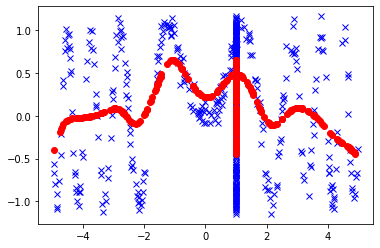

In [18]:
p05b(tau=5e-1,train_path='../data/ds5_train.csv',eval_path='../data/ds5_valid.csv')

2.4800152300960328
3.3980286773721557


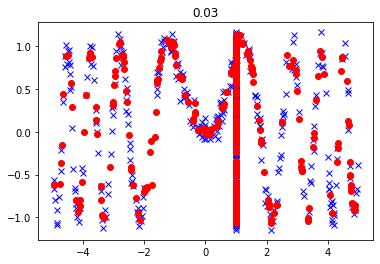

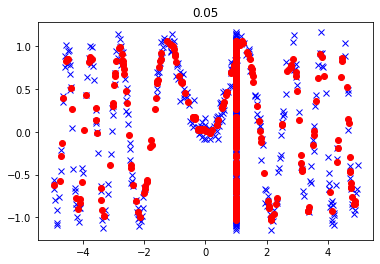

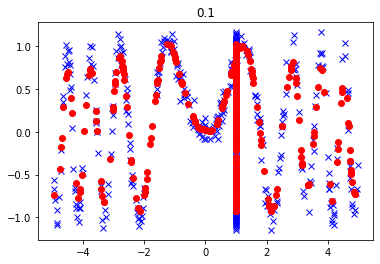

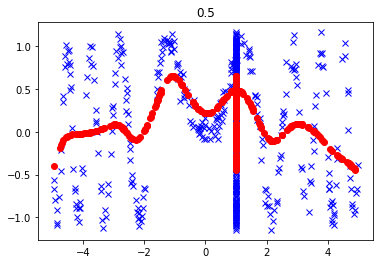

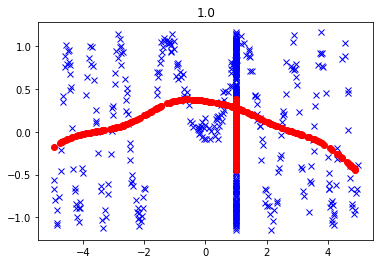

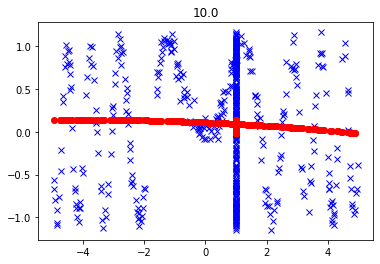

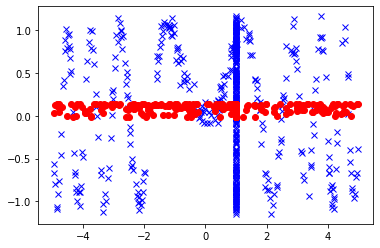

In [19]:
p05c(tau_values=[3e-2, 5e-2, 1e-1, 5e-1, 1e0, 1e1],
         train_path='../data/ds5_train.csv',
         valid_path='../data/ds5_valid.csv',
         test_path='../data/ds5_test.csv',
         pred_path='output/p05c_pred.txt')
